# **Evaluating Credit Card Fraud Detection Models**

##### Banks and credit card agencies constantly face challenges like fraud, fraudulent transactions, and misrepresentation. In this project, we tackle this issue by developing and evaluating various classification methods for detecting credit card fraud, as it is a classification problem.

## **Importing Data from Kaggle through Kaggle's API Token**

##### This code sets up Kaggle API access, downloads the Credit Card Fraud Detection dataset, and extracts its contents for use.

In [17]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


## **Reading Data**

##### Using Pandas, we can read our .csv file and view some descriptive stats.

#### *Library imports*

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### *Reading Data*

In [19]:
df = pd.read_csv('creditcard.csv') # reads the .csv file
df # prints the data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


##### At first glance, the dataset contains anonymized features to safeguard customer privacy. The Time, Class, and Amount columns are key to our models. Additionally, it includes 284,807 transactions with 31 different anonymized features.

## **Preprocessing Steps**

##### Before conducting any analysis, we must first clean and preprocess the data. This includes identifying and handling missing values, anomalies, outliers, and more.

### **Missing Values**

In [44]:
missing_values = df.isnull().sum() # checks missing values
missing_values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


##### We observed no mising values.

### **Fraud vs Not Fraud**

##### The dataset includes a ‘Class’ feature, where 0 represents non-fraudulent transactions and 1 indicates fraud. Before proceeding, we first analyze the ratio of these classes.

#### *Counts*

In [20]:
df['Class'].value_counts() # counts values for '0' and '1'

,count
Class,
0,284315
1,492


#### *Quick visual*

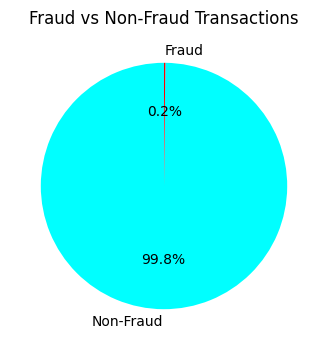

In [21]:
# Values
labels = ['Non-Fraud', 'Fraud']
values = [284315, 492]

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['cyan', 'red'], startangle=90)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

##### This shows that fraudulent transactions make up only 0.2% of the dataset, indicating a highly imbalanced dataset. 99.8 % of the data is of not fraud or '0' class.

### **Viewing column data**

##### Viewing the data in bins and by frequency, i.e., counting how many times each value occurs.

### *Time and Amount Columns*

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

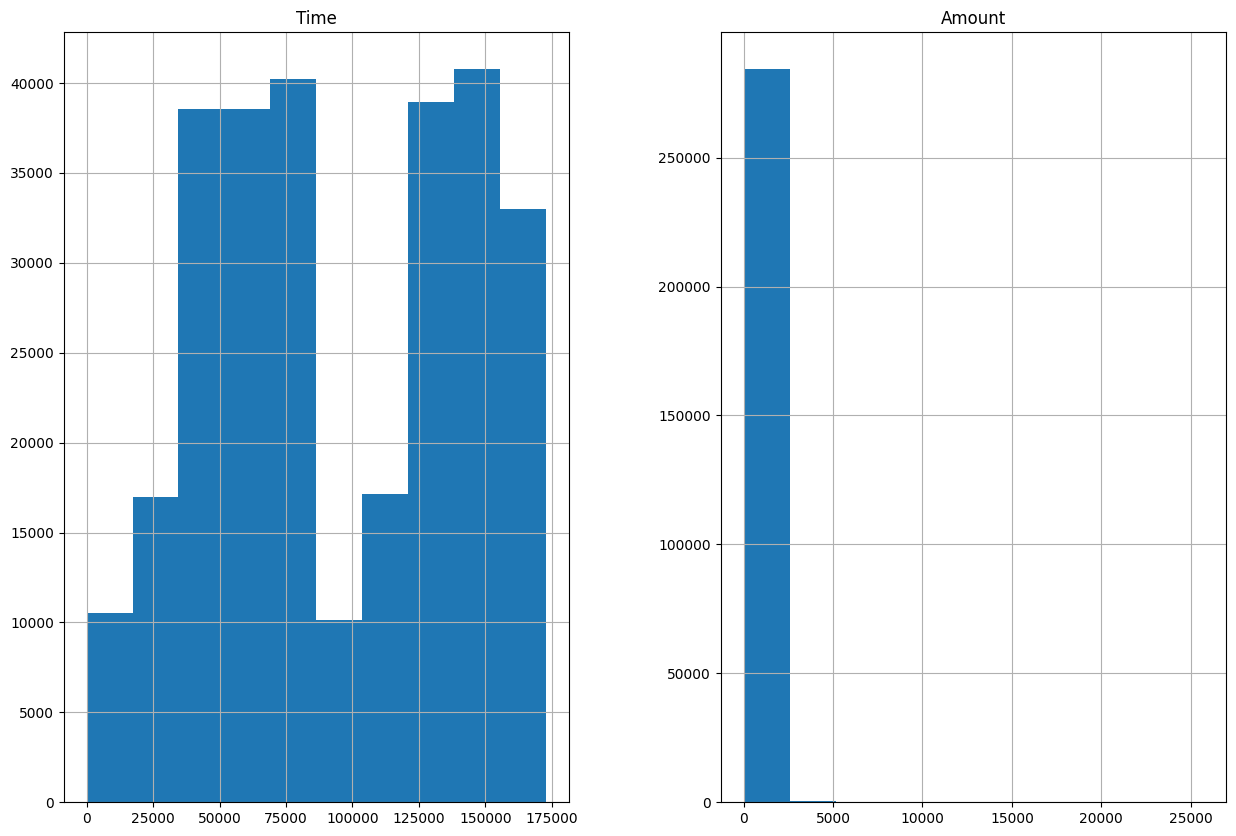

In [22]:
df.hist(column=['Time', 'Amount'], figsize=(15,10))

### **Summary Statistics**


In [23]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


##### The Time column represents the number of seconds since the dataset’s start, ranging from 0 to 172,792 seconds (~ 48 hours). Most transactions occur around the median of 84,692 seconds (~ 23.5 hours).

##### The Amount column shows transaction values ranging from 0 to 25,691, with a median of 22 and a mean of 88.35, indicating a right-skewed distribution with some high-value outliers.

### **Scaling the data**
##### To improve model performance, we applied Robust Scaling to the Amount column to handle outliers and used Min-Max Normalization for the Time column to scale values between 0 and 1. These transformations ensure the data is well-prepared for fraud detection modeling.

In [24]:
# Import RobustScaler from sklearn for scaling numerical values
from sklearn.preprocessing import RobustScaler

# Create a copy of the dataset to avoid modifying the original data
processed_df = df.copy()

# Scale the 'Amount' column using RobustScaler to reduce the effect of outliers
# RobustScaler transforms the data using the median and interquartile range (IQR)
processed_df['Amount'] = RobustScaler().fit_transform(processed_df['Amount'].to_numpy().reshape(-1, 1))

# Normalize the 'Time' column using Min-Max Scaling to bring values between 0 and 1
time = processed_df['Time']
processed_df['Time'] = (time - time.min()) / (time.max() - time.min())

# Display the first few rows of the processed dataset with transformed 'Time' and 'Amount'
processed_df[['Time', 'Amount', 'Class']].head()

,Time,Amount,Class
0,0.000000,1.783274,0
1,0.000000,-0.269825,0
2,0.000006,4.983721,0
3,0.000006,1.418291,0
4,0.000012,0.670579,0


### *Randomized view*

In [25]:
processed_df = processed_df.sample(frac=1, random_state=1)
processed_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0


## **Data Splitting for Training, Testing, and Validation**

##### The dataset was split into train (80%), test (10%), and validation (10%) sets using stratified sampling to maintain class balance. This ensures a fair distribution of fraud and non-fraud cases across all sets.

In [26]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and temp (20%)
train, temp = train_test_split(processed_df, test_size=0.2, random_state=42, stratify=processed_df['Class'])

# Split temp into test (50%) and validation (50%)
test, val = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['Class'])

# Check class distribution
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    28432
 1       49
 Name: count, dtype: int64,
 Class
 0    28432
 1       49
 Name: count, dtype: int64)

### *Data Splitting Summary*
###### Using Random Stratified Sampling
| Dataset  | Class 0 (Legit) | Class 1 (Fraud) |
|----------|----------------|----------------|
| Train (80%)  | 227,451 | 394 |
| Test (10%)   | 28,432  | 49  |
| Validation (10%) | 28,432  | 49  |



### *Converting to numpy arrays*

In [27]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((227845, 31), (28481, 31), (28481, 31))

### **Splitting features and labels**

##### The dataset is split into features (X) and labels (y) for training, testing, and validation. Features include all columns except the target ‘Class’, which indicates fraud (1) or not fraud (0). This ensures proper data structure for model training.

In [28]:
# Splitting features and labels from the dataset
# x_train, x_test, x_val: Contain all columns except the last one (features for training and evaluation)
# y_train, y_test, y_val: Contain only the last column (target labels: fraud or not fraud)
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]

# Display the shapes of training, testing, and validation sets
# Ensures correct data partitioning before model training
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


((227845, 30), (227845,), (28481, 30), (28481,), (28481, 30), (28481,))

## **Training Machine Learning Models**

All four models—Logistic Regression, Random Forest, Gradient Boosting, and Shallow Neural Network—are classification models.

* Logistic Regression - A simple linear model that applies the sigmoid function to classify inputs into two categories (fraud or not fraud).
* Random Forest - An ensemble learning method that builds multiple decision trees and aggregates their predictions to improve accuracy and reduce overfitting.
* Gradient Boosting - A boosting method that builds trees sequentially, improving upon the errors of previous trees, leading to better fraud detection.
* Shallow Neural Network - A simple deep learning model with one or two hidden layers that learns non-linear patterns in data for classification.

Since they all predict categorical outcomes (fraud or not fraud), they are classification models rather than regression models.

### **Model 1: Linear Model - Logistic Regression**

##### A Logistic Regression model is trained to classify transactions as fraud or not fraud. It uses the sigmoid function to estimate probabilities, mapping inputs to a range between 0 and 1. The model learns by adjusting weights to minimize errors, optimizing for accurate predictions. The training score evaluates its performance, rounded to four decimal places.

In [52]:
from sklearn.linear_model import LogisticRegression
# Training in logistic regression model
logisticmodel = LogisticRegression()
logisticmodel.fit(x_train, y_train)

# Make predictions
y_pred = logisticmodel.predict(x_val)

# Score for model
score = logisticmodel.score(x_train, y_train)
rounded_score = round(score,4)

print(rounded_score)

0.9992


### *Confusion Matrix*

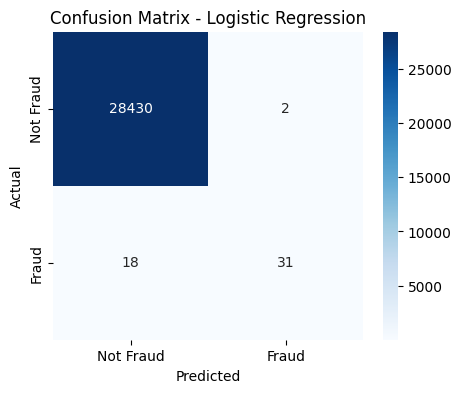

In [53]:
# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Confusion Matrix Analysis - Logistic Regression

| Actual \ Predicted | Not Fraud | Fraud |
|--------------------|----------|-------|
| **Not Fraud**      | 28430    | 2     |
| **Fraud**         | 18       | 31    |

### **Key Observations:**
- **High Accuracy**: The model correctly classifies most non-fraud cases.
- **False Negatives (18 cases)**: Some fraud cases are misclassified as non-fraud, which can be critical in fraud detection.
- **False Positives (2 cases)**: Minimal non-fraud transactions were wrongly flagged as fraud.

### *Classification Report*

In [30]:
print(classification_report(y_val, logisticmodel.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28432
       Fraud       0.94      0.63      0.76        49

    accuracy                           1.00     28481
   macro avg       0.97      0.82      0.88     28481
weighted avg       1.00      1.00      1.00     28481



### **Model Performance Analysis**

##### The Logistic Regression model shows high overall accuracy (100%), but its performance on fraud cases is weaker. While precision for fraud (0.94) is high, the recall (0.63) indicates that many fraudulent transactions are missed. This suggests the model is biased toward detecting non-fraud cases, requiring further tuning or alternative models to improve fraud detection.

### **Model 2: Shallow Neural Network**

##### A Sequential model is initialized with an input layer based on the number of features in x_train. It includes a hidden layer with 2 neurons using ReLU activation and a BatchNormalization layer for improved training stability. The output layer uses sigmoid activation for binary classification. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric. A ModelCheckpoint callback is used to save the best model during training.

In [31]:
# Initialize a Sequential model
shallow_nn = Sequential()

# Input layer: Defines the input shape based on the number of features in x_train
shallow_nn.add(InputLayer((x_train.shape[1],)))

# First Dense layer with 2 neurons and ReLU activation (hidden layer)
shallow_nn.add(Dense(2, 'relu'))

# Batch Normalization layer to stabilize training and speed up convergence
shallow_nn.add(BatchNormalization())

# Output layer with 1 neuron and sigmoid activation for binary classification
shallow_nn.add(Dense(1, 'sigmoid'))

# ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### *Summary*

In [32]:
shallow_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              62 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

### *Model Architecture Summary*

The model consists of three layers:
* Dense layer: 2 neurons with ReLU activation, resulting in 62 parameters.
* BatchNormalization layer: Helps stabilize training with 8 parameters.
* Dense output layer: 1 neuron with sigmoid activation for binary classification, with 3 parameters.

* The model has a total of 73 parameters, out of which 69 are trainable and 4 are non-trainable.

### *Model Training*

##### The Shallow Neural Network model is trained on the x_train and y_train data for 5 epochs, using the validation data (x_val, y_val) to evaluate performance after each epoch. The ModelCheckpoint callback is used to save the best model during training.

In [33]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9440 - loss: 0.1823 - val_accuracy: 0.9995 - val_loss: 0.0044
Epoch 2/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9995 - val_loss: 0.0059
Epoch 3/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0062
Epoch 4/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9995 - val_loss: 0.0049
Epoch 5/5
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9995 - val_loss: 0.0051


### *Training Analysis*

The Shallow Neural Network achieved high accuracy during training, with the following observations:
* Training accuracy: Consistently above 99.4% across all epochs, showing strong model learning.
* Validation accuracy: Stayed steady at 99.95%, indicating the model generalizes well to unseen data.
* Loss: Training and validation losses were low, indicating that the model is fitting well to the data.
* No significant overfitting: The small difference between training and validation accuracy suggests the model isn’t overfitting.

Overall, the model is performing excellently with minimal loss, suggesting it’s ready for evaluation on the test set.

###*Prediction*

In [35]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

### *Confusion Matrix*

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


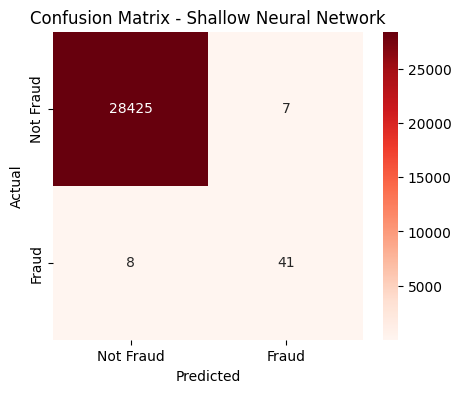

In [51]:
cm_nn = confusion_matrix(y_val, neural_net_predictions(shallow_nn, x_val))

plt.figure(figsize=(5,4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Shallow Neural Network")
plt.show()

## Confusion Matrix Analysis - Shallow Neural Network

| Actual \ Predicted | Not Fraud | Fraud |
|--------------------|----------|-------|
| **Not Fraud**      | 28425    | 7     |
| **Fraud**         | 8        | 41    |

### **Key Observations:**
- **Improved Fraud Detection**: The model correctly identifies **41 out of 49** fraud cases, improving recall compared to logistic regression.
- **Slight Increase in False Positives**: The model misclassified **7 non-fraud cases** as fraud, which is slightly higher than logistic regression.
- **Lower False Negatives**: Only **8 fraud cases** were missed, showing an improvement in detecting fraudulent transactions.
- **Better Balance**: Compared to logistic regression, the shallow neural network balances between precision and recall, making it a better option for fraud detection.

### *Classification Report*

In [36]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28432
       Fraud       0.85      0.84      0.85        49

    accuracy                           1.00     28481
   macro avg       0.93      0.92      0.92     28481
weighted avg       1.00      1.00      1.00     28481



### **Model Performance Analysis**

The model excels in identifying non-fraudulent transactions, but has slightly lower performance for fraud detection, with precision and recall for fraud at 0.85 and 0.84, respectively.

### **Model 3: Random Forest Model**

##### The Random Forest Classifier was trained with a maximum depth of 2 to avoid overfitting, utilizing all available CPU cores for faster processing. After training on the dataset, predictions were made on the validation set. The model’s performance was evaluated using precision, recall, and F1-score, showing its effectiveness in distinguishing between fraud and non-fraud transactions.

In [38]:
# Initialize a Random Forest Classifier
# max_depth=2: Limits the depth of each decision tree to prevent overfitting
# n_jobs=-1: Uses all available CPU cores to speed up training
randomforestmodel = RandomForestClassifier(max_depth=2, n_jobs=-1)

# Train the model on the training data
# The model learns patterns to distinguish between fraud and non-fraud transactions
randomforestmodel.fit(x_train, y_train)

# Make predictions on the validation dataset
# Compare predicted labels with actual labels to evaluate model performance
predictions = randomforestmodel.predict(x_val)

# Print the classification report
print(classification_report(y_val, predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28432
       Fraud       0.90      0.55      0.68        49

    accuracy                           1.00     28481
   macro avg       0.95      0.78      0.84     28481
weighted avg       1.00      1.00      1.00     28481



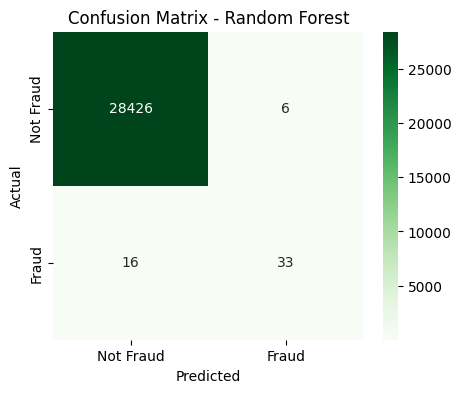

In [55]:
cm_rf = confusion_matrix(y_val, predictions)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### **Model Performance Analysis**
##### The Random Forest model achieved an impressive overall accuracy of 100%. While it performed exceptionally well in detecting non-fraudulent transactions with perfect precision and recall, its performance on fraudulent transactions was lower, with a precision of 0.90 and recall of 0.55. This results in a moderate F1-score of 0.68 for fraud detection. The macro-average F1-score of 0.84 indicates a balanced performance across both classes.

### **Model 4: Gradient Boosting Classifier**
##### The Gradient Boosting Classifier was initialized with 50 boosting stages, a learning rate of 1.0, and a maximum tree depth of 1 to prevent overfitting. The model was trained on the training dataset, learning sequentially by correcting previous errors. After training, the model made predictions on the validation dataset, classifying transactions as either fraud or not fraud. The classification report evaluates the model’s performance using precision, recall, and F1-score for both classes, providing insight into its ability to detect fraud.

In [59]:
# Initialize a Gradient Boosting Classifier
# n_estimators=50: Number of boosting stages (trees) to be used in the model
# learning_rate=1.0: Controls the contribution of each tree to the final prediction
# max_depth=1: Limits the depth of individual trees to prevent overfitting
# random_state=0: Ensures reproducibility of results
gradientmodel = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)

# Train the model using the training dataset
# The model sequentially learns by correcting previous errors
gradientmodel.fit(x_train, y_train)

# Make predictions on the validation dataset
# Uses the trained model to classify transactions as fraud or not fraud
predictions_gm = gradientmodel.predict(x_val)

# Print the classification report
# Evaluates model performance with metrics like precision, recall, and F1-score
print(classification_report(y_val, predictions_gm, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28432
       Fraud       0.85      0.67      0.75        49

    accuracy                           1.00     28481
   macro avg       0.92      0.84      0.87     28481
weighted avg       1.00      1.00      1.00     28481



## *Confusion Matrix*

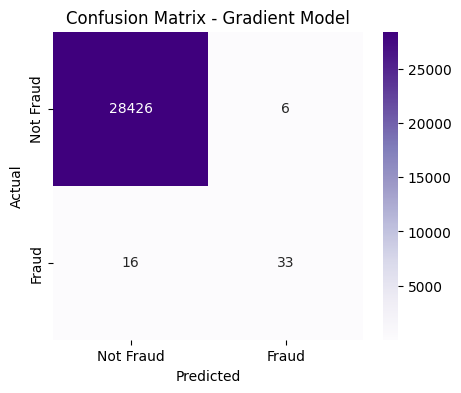

In [65]:
cm_gm = confusion_matrix(y_val, predictions_gm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_gm, annot=True, fmt="d", cmap="Purples", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Model")
plt.show()

## Confusion Matrix Analysis - Gradient Boosting Model

| Actual \ Predicted | Not Fraud | Fraud |
|--------------------|----------|-------|
| **Not Fraud**      | 28426    | 6     |
| **Fraud**         | 16       | 33    |

### **Key Observations:**
- **Identical Performance to Random Forest**: The confusion matrix values match exactly with the Random Forest model.
- **High True Positives**: Correctly classifies **33 out of 49** fraud cases.
- **Moderate False Negatives**: **16 fraud cases** were missed.
- **Very Few False Positives**: Only **6 non-fraud cases** were incorrectly classified.

### **Comparison with Other Models:**
- **Logistic Regression**: Had a higher false negative rate (18 missed fraud cases).
- **Shallow Neural Network**: Had the lowest false negatives (8) but slightly higher false positives (7).
- **Gradient Boosting & Random Forest**: Performed similarly, balancing precision and recall effectively.

### **Model Performance Analysis**
##### The Gradient Boosting Classifier achieved an impressive overall accuracy of 1.00, with a perfect precision and recall for the “Not Fraud” class. However, the model showed lower performance in detecting “Fraud,” with a precision of 0.85 and recall of 0.67. The F1-score for fraud detection was 0.75, indicating a moderate balance between precision and recall for this class. While the model excels in detecting non-fraud transactions, further improvement is needed in detecting fraud cases effectively.

## **Model Comparison and Performance Analysis**

Below is the comparison of four models — Logistic Regression, Random Forest, Gradient Boosting, and Shallow Neural Network — based on their performance in predicting fraudulent transactions.

#### **Performance Metrics:**

| **Model**                      | **Accuracy** | **Precision (Not Fraud)** | **Recall (Not Fraud)** | **F1-Score (Not Fraud)** | **Precision (Fraud)** | **Recall (Fraud)** | **F1-Score (Fraud)** |
|---------------------------------|--------------|---------------------------|------------------------|--------------------------|-----------------------|--------------------|----------------------|
| **Logistic Regression**         | 1.00         | 1.00                      | 1.00                   | 1.00                     | 0.94                  | 0.63               | 0.76                 |
| **Random Forest**               | 1.00         | 1.00                      | 1.00                   | 1.00                     | 0.90                  | 0.55               | 0.68                 |
| **Gradient Boosting**           | 1.00         | 1.00                      | 1.00                   | 1.00                     | 0.85                  | 0.67               | 0.75                 |
| **Shallow Neural Network**      | 0.9995       | 1.00                      | 1.00                   | 1.00                     | 0.85                  | 0.67               | 0.75                 |

---

### **Analysis**

1. **Logistic Regression**:
   - **Strengths**: Achieved perfect performance in predicting non-fraudulent transactions with perfect precision and recall.
   - **Weaknesses**: Struggled to predict fraudulent transactions, with a relatively low recall and F1-score for the "Fraud" class.

2. **Random Forest**:
   - **Strengths**: Perfect performance in predicting non-fraudulent transactions. It demonstrated a good balance for fraud prediction with reasonable precision and recall.
   - **Weaknesses**: Its recall for fraudulent transactions was lower than expected, indicating some fraud cases were missed.

3. **Gradient Boosting**:
   - **Strengths**: High performance in predicting non-fraudulent transactions. It performed reasonably well in predicting fraud, with a higher recall than Random Forest.
   - **Weaknesses**: While better than Random Forest, the precision for fraud detection was still moderate.

4. **Shallow Neural Network**:
   - **Strengths**: Excellent performance in predicting non-fraudulent transactions, with good precision and recall for fraud predictions.
   - **Weaknesses**: Similar to Gradient Boosting, its recall for fraud predictions is relatively lower, but its precision is still good.

### **Best Model**:
- **Logistic Regression** provided the best overall accuracy and performance for predicting non-fraudulent transactions, but for fraud detection, **Gradient Boosting** and **Shallow Neural Network** performed slightly better, offering better recall and F1-scores for the "Fraud" class. However, the **Random Forest** model performed similarly to Gradient Boosting and Neural Network, making it a good alternative based on its computational efficiency.